##### Copyright 2022 The Cirq Developers

In [33]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Hello Qubit

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/start/start"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/main/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/main/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

In [34]:
import sys
sys.meta_path[:] = [f for f in sys.meta_path if "DaskFinder" not in str(f)]

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Results:
result=000001111011001000000110110000001111111001110010011110110001010001000000100111111100001110001110001001100110000011110110001111101110101101101111100010011010001111100010010100010010011010000111000101110000101000011011100111000000000100000101011111111010000101111010111100011000011000100011100000100010101110111110010110101101101111100000101110010011011100111110001010000111110011111100110101100101001010010101111010101111101100011010110100001100001011001010111101100110110010110010010111011010100100001011110011111000010010011010101111111101001011011011010100101111110100110100111100111100111100011101001000010110101110101001111111011101000011000101101101110000101101110111011000101010100011111110001110001100110101000100101011000010011001111010111101001010000101100110001100011111100010001110100001100001101001011000010110011001011101000111000010110010110100101010000110001000100000111010001010000000001000110000000111111010101011110001110101110011100011011110011011010000011010111100

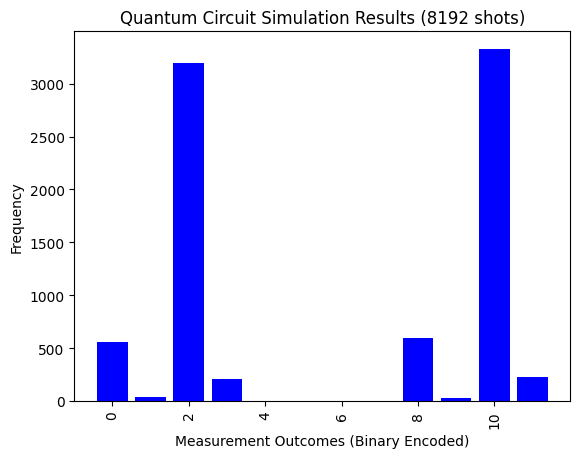

{'000': 0.4800693240901213, '001': 0.5675675675675675, '010': 0.4901900674432863, '011': 0.4818181818181818}


In [47]:
#arbirary angles
theta_0 = np.pi/6
theta_1 = np.pi/4
theta_2 = np.pi/3

#Form curcuit
qubits = [cirq.LineQubit(i) for i in range(4)]
circuit = cirq.Circuit()

#Append 20 gates
circuit.append(cirq.X(qubits[0]))
circuit.append(cirq.S(qubits[1]))
circuit.append(cirq.H(qubits[2]))
circuit.append(cirq.X(qubits[3]))
circuit.append(cirq.Z(qubits[0]))
circuit.append(cirq.X(qubits[1]))
circuit.append(cirq.T(qubits[3]))
circuit.append(cirq.X(qubits[0]))
circuit.append(cirq.CNOT(qubits[3], qubits[2]))
circuit.append(cirq.CZ(qubits[0], qubits[1]))
circuit.append(cirq.Y(qubits[2]))
circuit.append(cirq.X(qubits[3]))
circuit.append(cirq.SWAP(qubits[2], qubits[3]))
circuit.append(cirq.CNOT(qubits[2], qubits[3]))
circuit.append(cirq.CCNOT(qubits[2], qubits[1], qubits[0]))
circuit.append(cirq.CZ(qubits[2], qubits[3]))
circuit.append(cirq.Rx(rads=theta_0)(qubits[0]))
circuit.append(cirq.Ry(rads=theta_1)(qubits[1]))
circuit.append(cirq.Rz(rads=theta_2)(qubits[2]))
circuit.append(cirq.X(qubits[3]))

# Reverse qubit order for measurement
circuit.append(cirq.measure(*qubits[::-1], key='result'))

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=8192)

print("Results:")
print(result)

histogram = result.histogram(key='result')
# Analyze results
counts = Counter()
for outcome, freq in histogram.items():
    binary_outcome = f"{outcome:04b}"
    counts[binary_outcome] += freq

# Calculate conditional probabilities
conditional_probabilities = {}
for q2q1q0 in [f"{i:03b}" for i in range(8)]:
    total = sum(freq for outcome, freq in counts.items() if outcome[1:] == q2q1q0)
    if total > 0:
        prob_q3_0 = sum(freq for outcome, freq in counts.items() if outcome[1:] == q2q1q0 and outcome[0] == '0') / total
        conditional_probabilities[q2q1q0] = prob_q3_0

# Step 5: Show output histogram
plt.bar(histogram.keys(), histogram.values(), color='blue')
plt.xlabel("Measurement Outcomes (Binary Encoded)")
plt.ylabel("Frequency")
plt.title("Quantum Circuit Simulation Results (8192 shots)")
plt.xticks(rotation=90)
plt.show()


# Display the calculated conditional probabilities
print(conditional_probabilities)

# Congratulations
You've just run your first Cirq program.

To learn about running a circuit on a virtual machine that mimics existing quantum hardware, see [Quantum Virtual Machine](../simulate/quantum_virtual_machine.ipynb).

If you would like to learn more about quantum computing, check out our [education page](https://quantumai.google/resources). The Full API reference for Cirq can be found [here](/reference/python/cirq). If you are looking for vendor specific information that can be found on our vendor sub-pages:


  [Alpine Quantum Technologies](../hardware/aqt/getting_started.ipynb)
  
  [Pasqal](../hardware/pasqal/getting_started.ipynb)
  
  [IonQ](../hardware/ionq/getting_started.ipynb)
  
  [Azure](../hardware/azure-quantum/getting_started_honeywell.ipynb)
  
  [Rigetti](../hardware/rigetti/getting_started.ipynb)